**линейный классификатор**

правило Хэбба

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

---

In [2]:
from sklearn.datasets import make_blobs
from time import time

def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [3]:
n_samples = 500
n_clst = 2 # количество классов

X,y = make_blobs( 
        n_samples=n_samples,
        centers=n_clst,  
        random_state=get_seed(),
        cluster_std=[1.0, 1.5,]
    )

In [4]:
X.shape, y.shape

((500, 2), (500,))

In [5]:
# значение y это +1 или -1
y = y*2-1

In [6]:
# нормируем данные
# from sklearn.preprocessing   import MinMaxScaler
# X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

X = (2.0*(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0)))-1.0

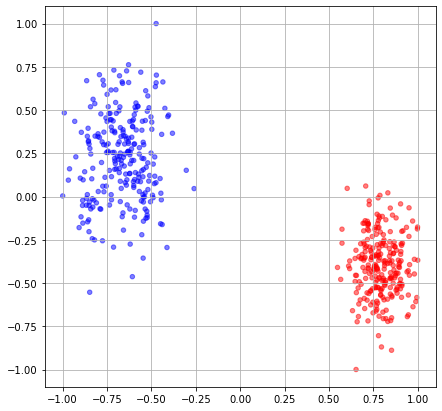

In [7]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

$$a(x,w) = sign\left(\sum\limits_{i=1} x_i \cdot w_i + w_0\right)$$

In [8]:
Xp = np.hstack([np.ones([X.shape[0],1]),X])
Xp.shape

(500, 3)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Xp,y,test_size=0.8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 3), (100,), (400, 3), (400,))

In [10]:
%xdel Xp
%xdel X
%xdel y
# %xdel data

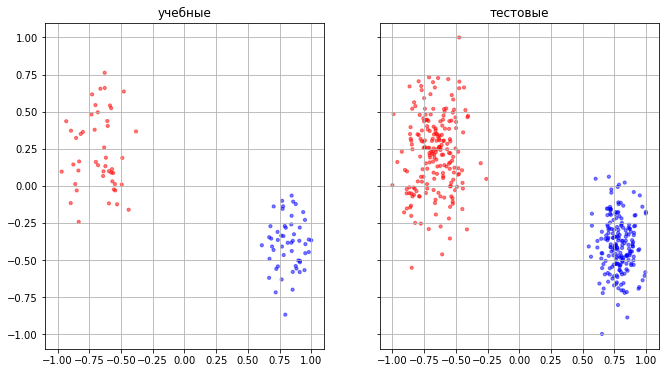

In [11]:
f, axarr = plt.subplots(1,2, sharey=True, sharex=True, figsize=(11,6),)
    
axarr[0].set_title('учебные')
axarr[0].scatter( x=X_train[:,1], 
                  y=X_train[:,2], 
                  c=[['b','r','g','y'][int(j>0)] for j in y_train ],  
                  s=10,
                  alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('тестовые')
axarr[1].scatter( x=X_test[:,1], 
                  y=X_test[:,2], 
                  c=[ ['b','r','g','y'][int(j>0)] for j in y_test],
                  s=10,
                  alpha=0.5 )
axarr[1].grid()

plt.show()

---

---

In [12]:
def loss(x,w,y): return -x.dot(w)*y

In [13]:
MAX_ITER = 3 # максимальное число циклов обучения

# порог ошибки (количество ошибок)
ERROR_BOUND = -0.9

a = 0.5 # скорость обучения
l = 0.5 # темп "забывания"

er_hist = [] # история ошибки

In [14]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=X_train.shape[1]) # *1e-2
W 

array([ 0.11074157,  0.08501865, -0.06073448])

In [15]:
q = loss(X_train,W,y_train).sum()
er_hist.append( q )

In [16]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):

    if stop: break

    for j in np.random.permutation(X_train.shape[0]):
        
        if er_hist[-1] < ERROR_BOUND: # проверяем достижение порога
            print( 'error bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break
            
        xj,yj = X_train[j,:],y_train[j]
                        
        r = np.sign( xj.dot(W) ) # выход
        
        if (r*yj)<0: 
            W = W + a*xj.T.dot(y_train[j])
        
        # значение ф-ции потери
        qj = loss(xj,W,yj)
        q = l*qj +(1-l)*q
        er_hist.append( q )     
        


In [17]:
print(W)
print(len(er_hist),er_hist[-1])

[ 0.11074157 -0.64596504  0.40809463]
301 -0.5204564776643849


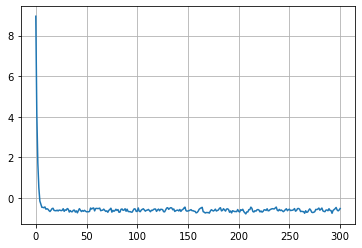

In [18]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [19]:
r = np.sign(X_test.dot(W)) 

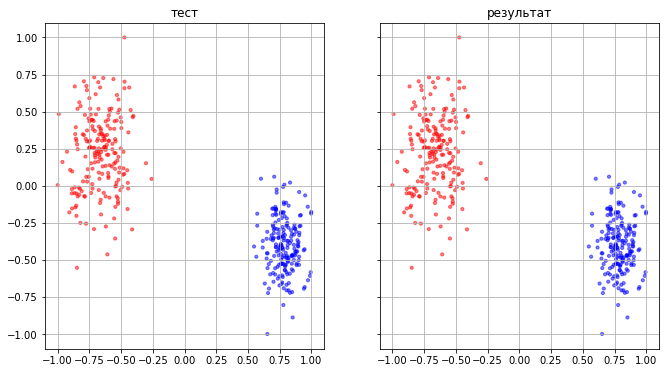

In [20]:
f, axarr = plt.subplots(1,2, sharey=True, sharex=True, figsize=(11,6),)
    
axarr[0].set_title('тест')
axarr[0].scatter( x=X_test[:,1], 
                  y=X_test[:,2], 
                  c=[ ['b','r','g','y'][int(j>0)] for j in y_test],
                  s=10,
                  alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат')
axarr[1].scatter( x=X_test[:,1], 
                  y=X_test[:,2], 
                  c=[['b','r','g','y'][int(j>0)] for j in r ],  
                  s=10,
                  alpha=0.5 )
axarr[1].grid()


plt.show()